In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Import data and convert date column to datetime datatype
historic_sentiment_analysis = pd.read_csv('historic_sentiment_analysis.csv')
historic_sentiment_analysis['date'] = pd.to_datetime(historic_sentiment_analysis['date'])

# Trends

In [2]:
print(f"Total days analyzed: {len(historic_sentiment_analysis['date'].unique())}")

Total days analyzed: 48


In [3]:
def trend_data(TREND_LENGTH):
    '''
    Input: integer for desired trend length (n_days)
    Output: dataframe with current n_days of trending data
    '''
    max_length = len(historic_sentiment_analysis['date'].unique())

    try:
        return pd.concat(
        [historic_sentiment_analysis[historic_sentiment_analysis['date'] == historic_sentiment_analysis['date'].unique()[-TREND_LENGTH:][i]] for i in range(TREND_LENGTH)]
        )
    except IndexError:
        print(f"The max trend length is {max_length} days! Please try again with a smaller trend length\n")

In [4]:
def trending_stocks(TREND_LENGTH):
    '''
    Input: desired length of trend (n_days)
    Output: List of stocks that appear in last n_days sentiment analysis
    '''
    trending_stocks_idx = np.where(trending_data['stock'].value_counts().values == TREND_LENGTH)

    return list(trending_data['stock'].value_counts().iloc[trending_stocks_idx].index)

In [5]:
def plot_trends(sentiment_list):
    '''
    Input: sentiment list (string array)
    Output: Trend plot
    '''

    for sentiment in sentiment_list:
        fig = go.Figure()

        for stock in trending:
            fig.add_trace(go.Line(x=trending_data[trending_data['stock'] == stock]['date'],
                                y=trending_data[trending_data['stock'] == stock][sentiment],
                                mode='lines',
                                name=f'{stock}'))

        fig.update_layout(title=f'WSB {sentiment} Sentiment',
                    xaxis_title='Date',
                    yaxis_title='Sentiment Score')

        fig.show()

In [6]:
TREND_LENGTH = 5
sentiment_list = ['Bullish', 'Total_Compound']

trending_data = trend_data(TREND_LENGTH)
trending = trending_stocks(TREND_LENGTH)
plot_trends(sentiment_list)

/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# Statistical Summary

In [7]:
def average_sentiment(trending_data, sentiment_type='Total_Compound'):
    '''
    Input: dataframe of trending data, sorted by desired sentiment_type
    Output: same dataframe, sorted by desired sentiment type, descending (displays top 5 stocks only)
    '''
    global summary_data # declare global variable
    
    print(f"Top 5 {sentiment_type} sentiments are: \n")
    summary_data = trending_data.groupby(['stock']).mean()[['Bullish', 'Bearish', 'Total_Compound']].reset_index()
    summary_data.sort_values(by=sentiment_type, ascending=False, inplace=True)
    print(summary_data.head())

In [8]:
average_sentiment(trending_data, 'Bullish')

NameError: name 'highest_sentiment' is not defined

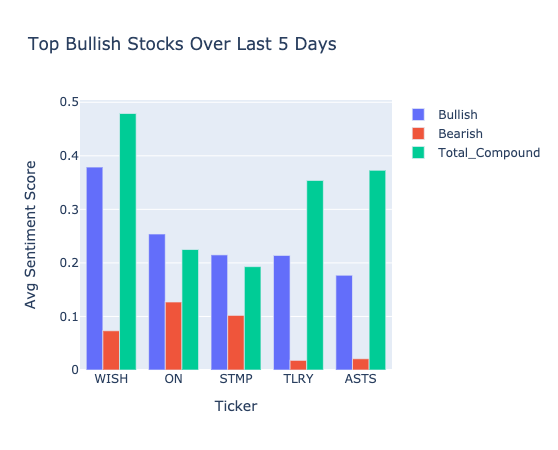

In [27]:
# Plot results
def plot_average_sentiment():
    fig = go.Figure(data = [
        go.Bar(name='Bullish', x=summary_data.head()['stock'], y=summary_data.head()['Bullish']),
        go.Bar(name='Bearish', x=summary_data.head()['stock'], y=summary_data.head()['Bearish']),
        go.Bar(name='Total_Compound', x=summary_data.head()['stock'], y=summary_data.head()['Total_Compound'])
    ])

    fig.update_layout(title=f'Top Bullish Stocks Over Last 5 Days',
        xaxis_title='Ticker',
        yaxis_title='Avg Sentiment Score')

    fig.show()

plot_average_sentiment()